# Welcome to 'The Story of an Avocado'

1. Test for bias in dataset
2. Exploratory data analysis
3. Price analysis
4. Predictive model

In [159]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import pandas as pd
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [155]:
avo = pd.read_csv('/Users/SurabhiGupta/Desktop/hackathon/avocado.csv',encoding='unicode_escape')

In [292]:
avo.sample(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
6098,5,11/26/17,1.23,165103.00,3566.00,62154.00,475.00,98908.00,15934.00,82960.00,14.00,conventional,2017,CincinnatiDayton
11381,19,8/16/15,1.70,47726.72,7047.78,27537.99,2.65,13138.30,0.00,13138.30,0.00,organic,2015,Seattle
15323,52,1/1/17,1.58,5948.66,772.98,2724.28,0.00,2451.40,2273.79,177.61,0.00,organic,2017,Columbus
6057,17,9/3/17,2.00,614460.20,65246.80,343566.36,114879.68,90767.36,79318.59,7988.55,3460.22,conventional,2017,Chicago
7796,7,11/12/17,1.16,433591.00,168076.00,140122.00,16004.00,109389.00,100528.00,5510.00,3351.00,conventional,2017,SanDiego
4085,29,6/5/16,0.99,786071.68,474319.60,149114.65,252.33,162385.10,56515.95,98746.65,7122.50,conventional,2016,MiamiFtLauderdale
4271,7,11/6/16,1.93,767190.62,10277.48,460230.47,3519.45,293163.22,250705.71,42457.51,0.00,conventional,2016,NewYork
12995,22,7/24/16,2.17,4109.11,2932.78,193.15,33.18,950.00,940.00,10.00,0.00,organic,2016,Jacksonville
9479,41,3/15/15,1.52,94419.17,65441.32,21855.14,0.00,7122.71,7122.71,0.00,0.00,organic,2015,California
5803,28,6/18/17,1.21,92906.33,40471.78,3263.11,8414.51,40756.93,40688.09,26.66,42.18,conventional,2017,Boise


## 1. Test for bias in dataset

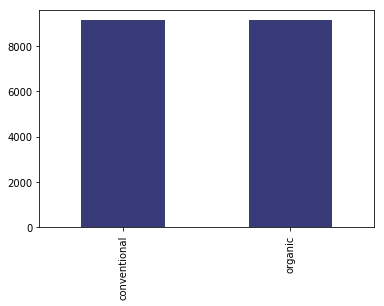

In [43]:
avo['type'].value_counts().plot(kind='bar',colormap='tab20b')

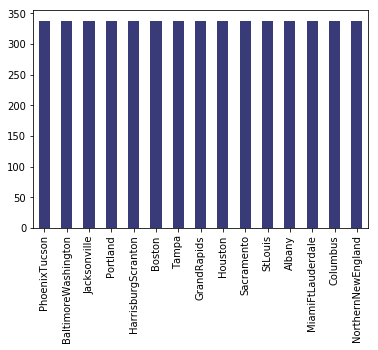

In [13]:
avo['region'].value_counts().head(15).plot(kind='bar',colormap='tab20b')

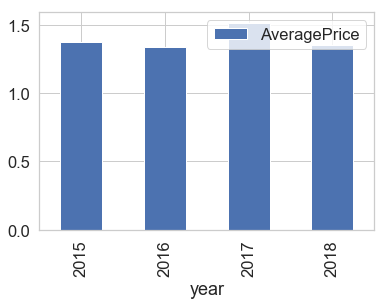

In [60]:
avo.groupby('year')[['AveragePrice']].mean().plot(kind='bar')

In [ ]:
avo.info(null_counts=True)

In [ ]:
avo.type.unique()

In [ ]:
avo.region.unique()

## 2. Exploratory Data Analysis (heatmap, pairplot, scatterplot)

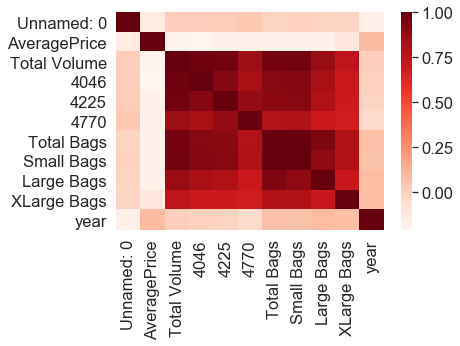

In [48]:
sns.heatmap(avo.corr(), cmap='Reds')

In [51]:
numeric_variables = avo.columns[avo.dtypes == float ].tolist()
numeric_variables.remove('AveragePrice')

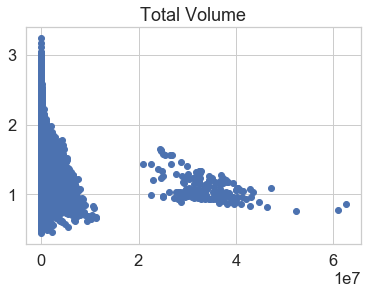

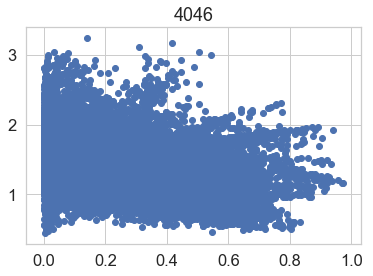

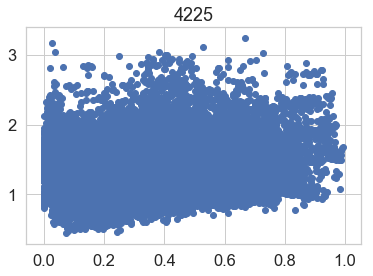

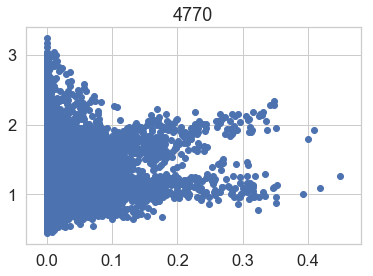

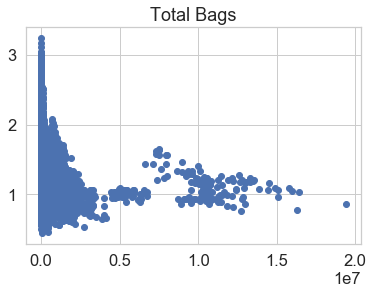

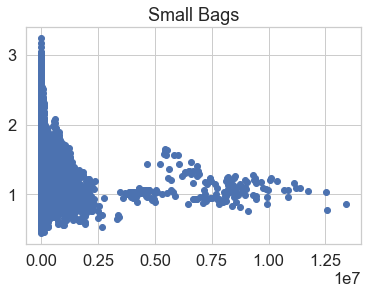

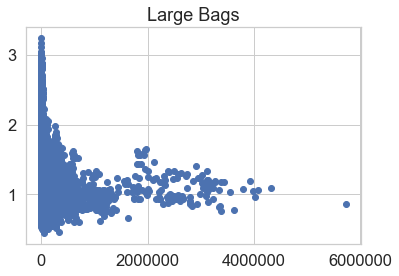

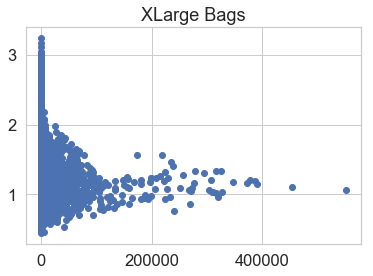

In [87]:
for col in numeric_variables:
    plt.scatter(x=avo[col], y=avo['AveragePrice'])
    plt.title(col)
    plt.show()

In [56]:
df_organic = avo[avo['type'] != 'organic']

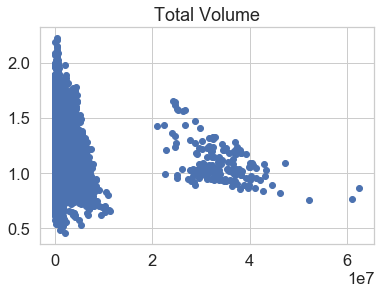

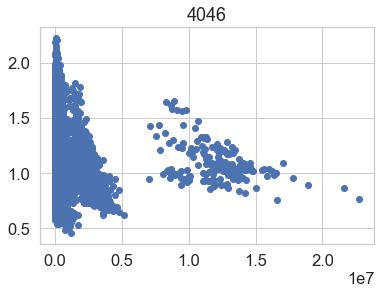

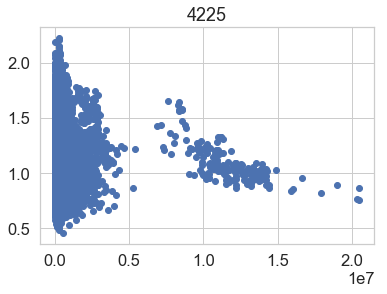

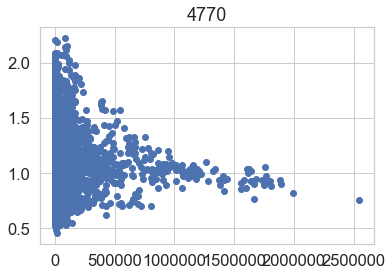

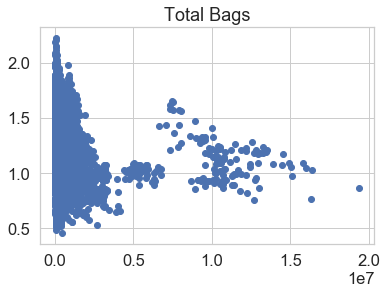

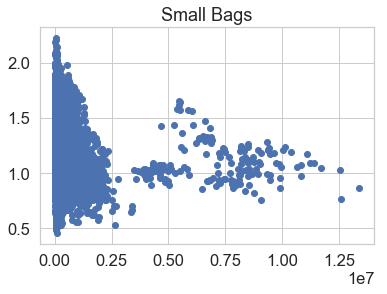

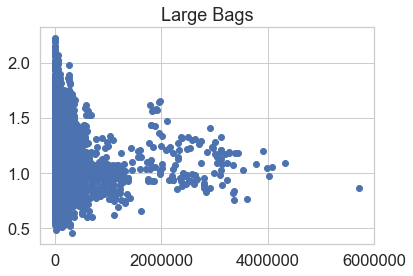

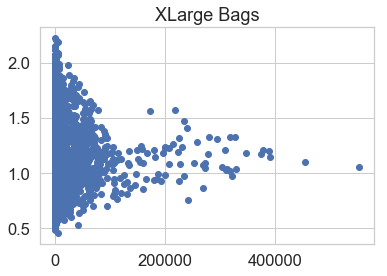

In [82]:
for col in numeric_variables:
    plt.scatter(x=df_organic[col], y=df_organic['AveragePrice'])
    plt.title(col)
    plt.show()

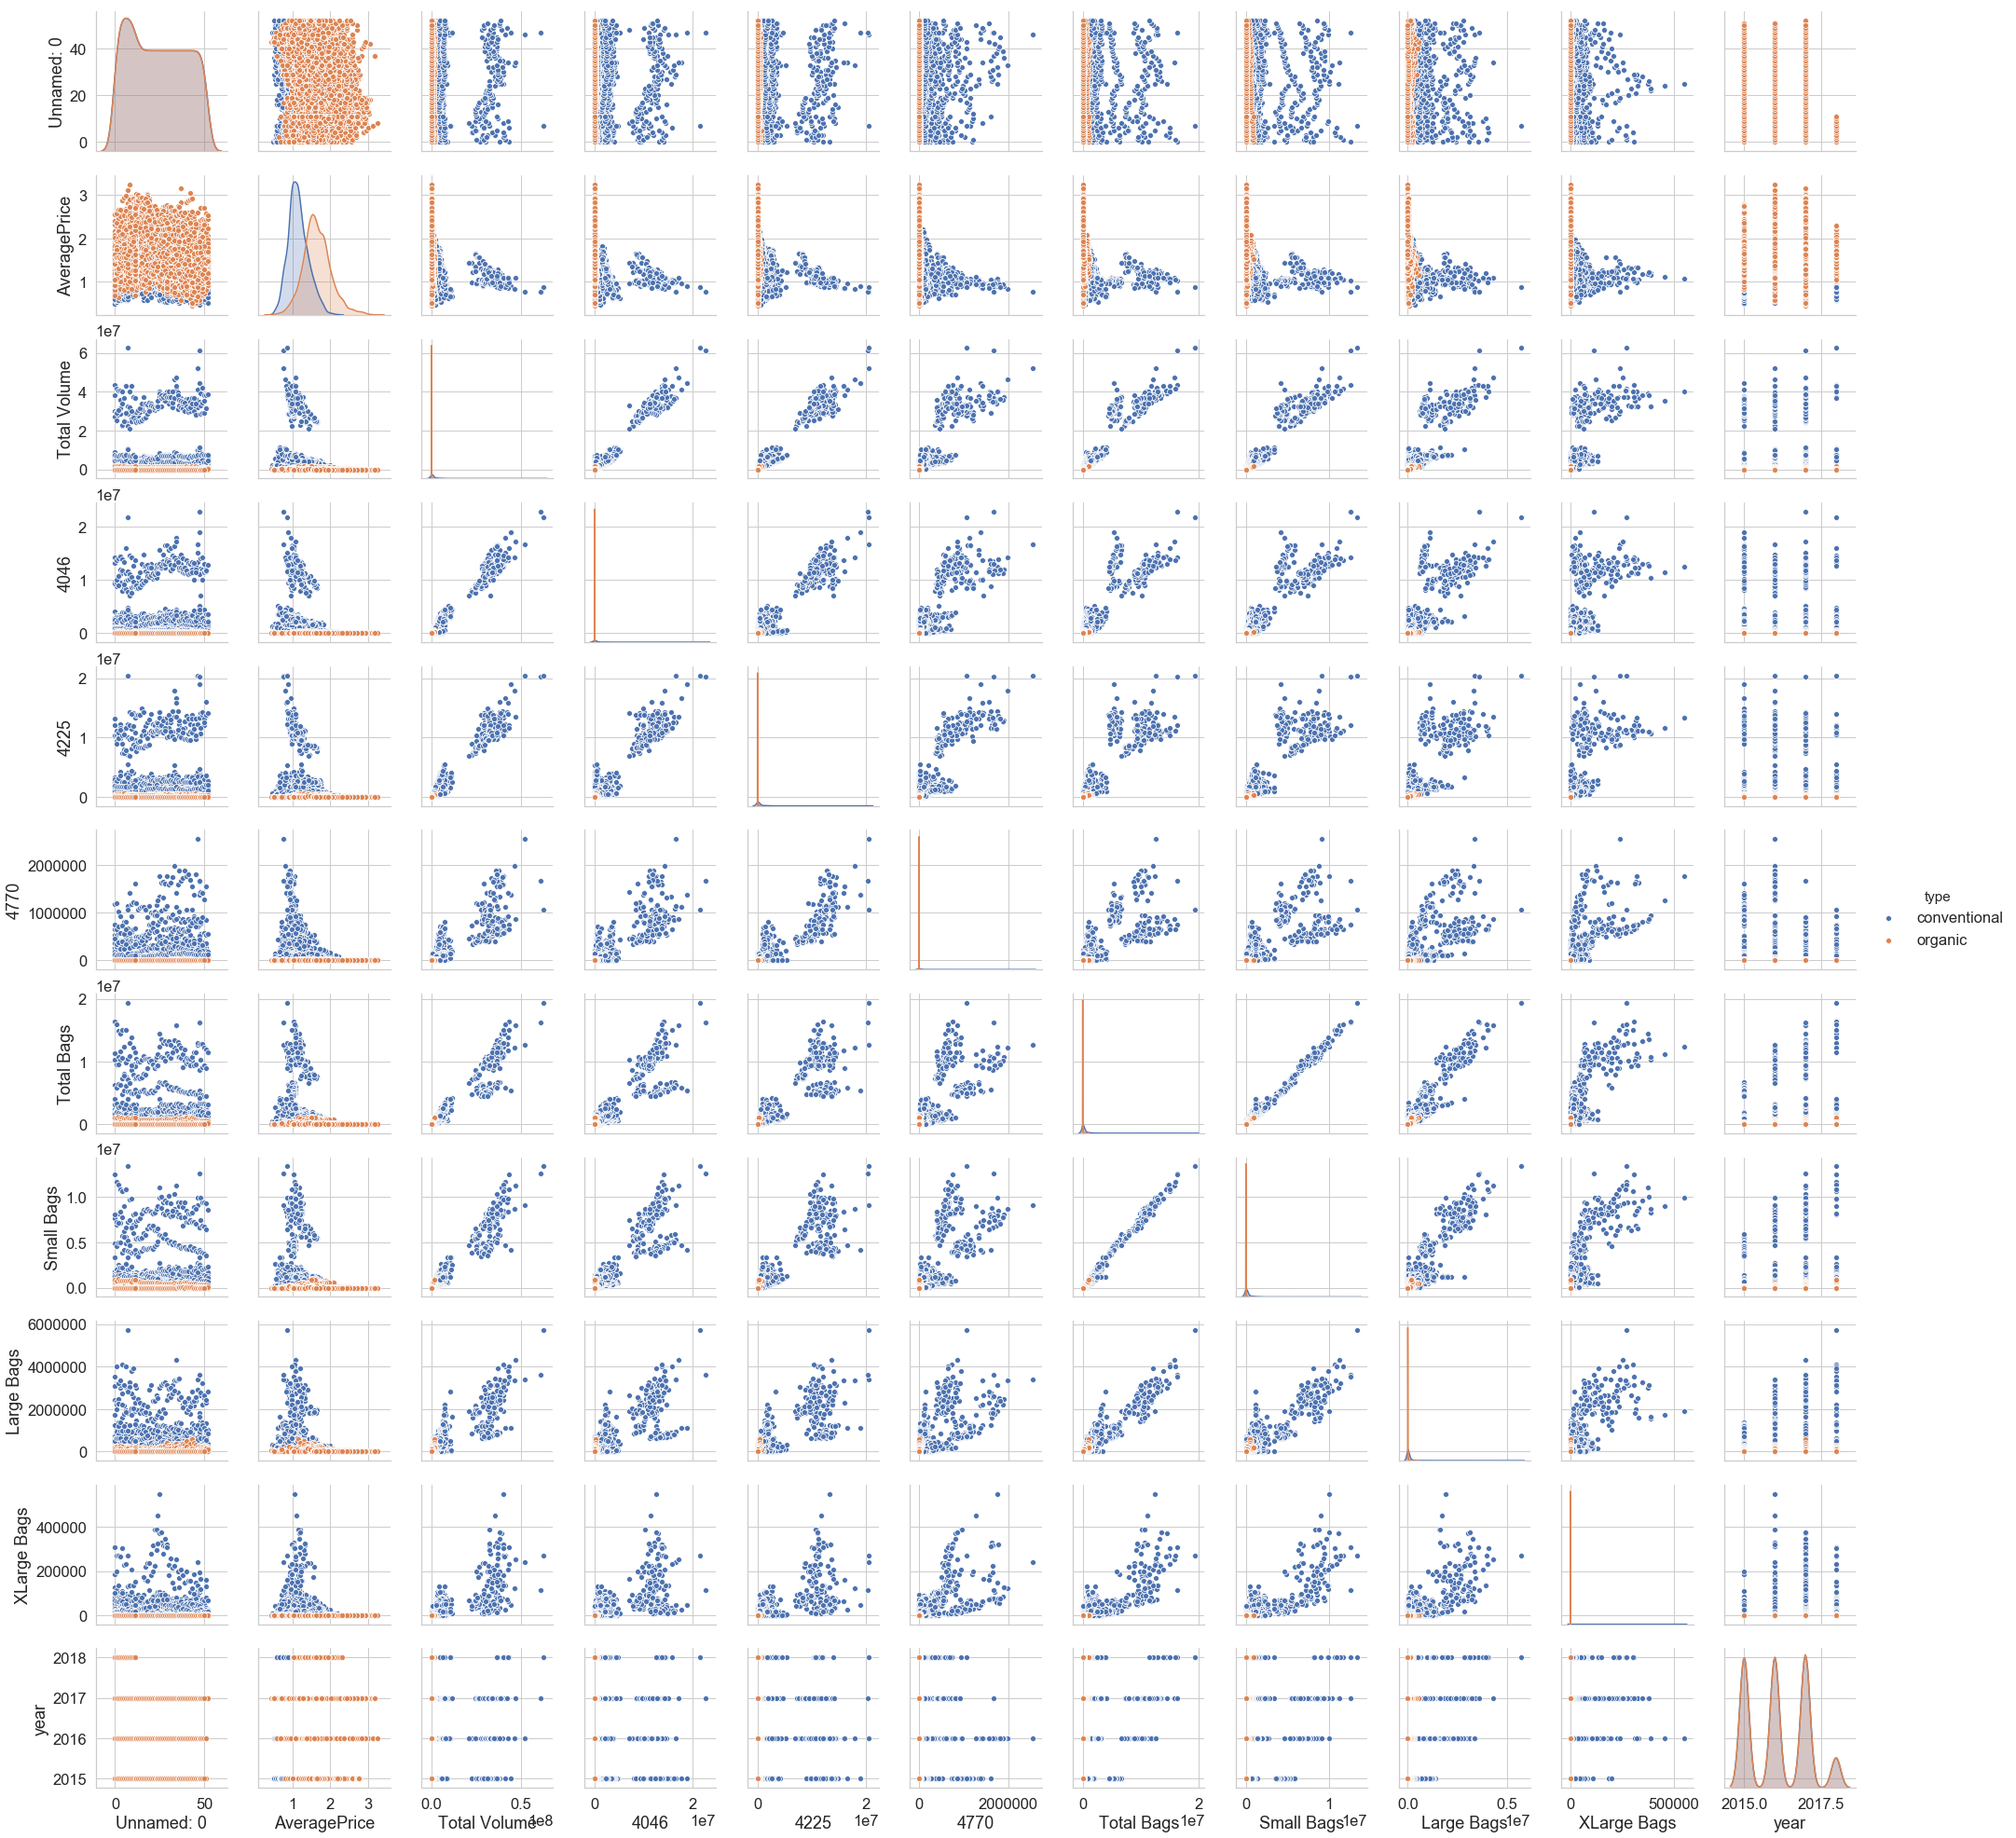

In [162]:
sns.pairplot(avo, hue="type")

/Users/SurabhiGupta/.dataprophet3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


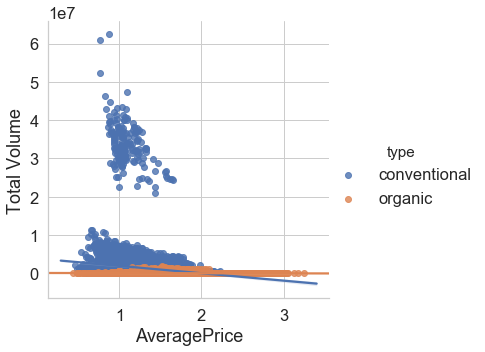

In [169]:
# avo.plot(kind="scatter", x="AveragePrice", y='Total Volume')
sns.lmplot(data=avo, x="AveragePrice", y='Total Volume', hue="type")

## 3. Price estimations

# According to region

In [61]:
regions=list(avo.region.unique())
avg_price=[]

In [62]:
avg_price = avo.groupby('region')['AveragePrice'].mean()

In [63]:
avg_price = avg_price.sort_values(ascending=True)

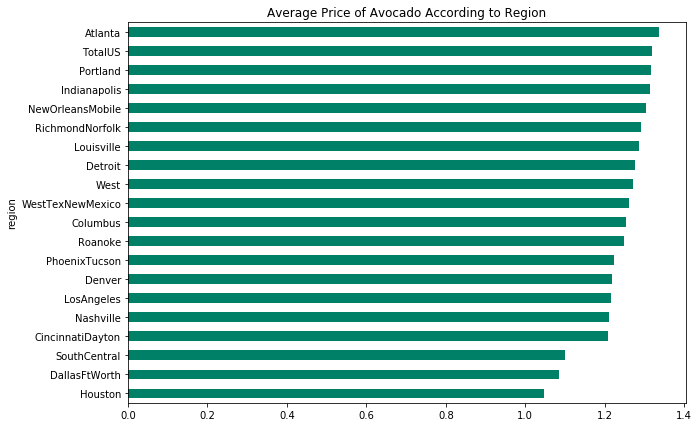

In [32]:
plt.figure(figsize=(10,7))
avg_price.plot(kind='barh',colormap='summer',title='Average Price of Avocado According to Region',)

# According to Type

In [35]:
types=list(avo.type.unique())
average_price2=[]

In [36]:
average_price2=avo.groupby('type')['AveragePrice'].mean()

Text(0.5,1,'Average Price of Avocado According to Types')

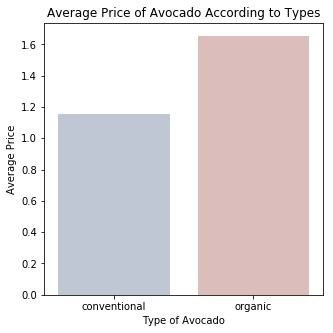

In [38]:
plt.figure(figsize=(5,5))
ax=sns.barplot(x=types,y=average_price2,palette='vlag')
plt.xlabel('Type of Avocado')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Types')

# According to time

In [68]:
avo['parsed_date'] = avo['Date'].apply(pd.Timestamp)

In [80]:
avo_type_cols = ['4046', '4225', '4770']

In [86]:
for col in avo_type_cols:
    avo[col] /= avo['Total Volume']

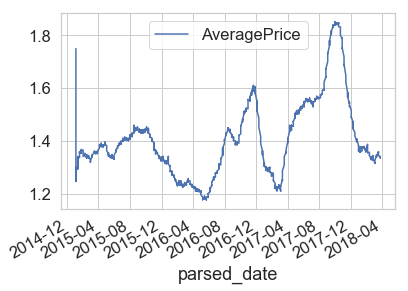

In [76]:
df_ts = avo.set_index('parsed_date').sort_index().rolling('30d').mean()[['AveragePrice']].plot()

# 4. Model to predict AveragePrice

In [92]:
from keras import layers as lyr
from keras.models import Model
from sklearn.model_selection import train_test_split

In [89]:
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/15,1.33,64236.62,0.016139,0.847723,0.000750,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/15,1.35,54876.98,0.012287,0.813434,0.001063,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/15,0.93,118220.22,0.006722,0.923274,0.001104,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/15,1.08,78992.15,0.014331,0.911184,0.000919,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/15,1.28,51039.60,0.018446,0.858909,0.001485,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [135]:
features = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags',
 'Large Bags','XLarge Bags']
label = 'AveragePrice'

In [147]:
def get_model():
    inputs = lyr.Input(shape=(len(features),))
    dense1 = lyr.Dense(64, activation='relu')(inputs)
    b_norm = lyr.BatchNormalization()(dense1)
    dense2 = lyr.Dense(64, activation='relu')(b_norm)
    dense3 = lyr.Dense(32, activation='relu')(dense2)
    outputs = lyr.Dense(1, activation='relu')(dense3)   
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mae')
    return model

In [149]:
X_train, X_test, y_train, y_test = train_test_split(avo[features].values, 
                                                    avo[label].values, test_size=0.2)

In [150]:
model = get_model()

In [151]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

Train on 14599 samples, validate on 3650 samples
Epoch 1/10
14599/14599 [==============================] - 1s 58us/step - loss: 0.4144 - val_loss: 0.3237
Epoch 2/10
14599/14599 [==============================] - 0s 23us/step - loss: 0.2909 - val_loss: 0.3231
Epoch 3/10
14599/14599 [==============================] - 0s 23us/step - loss: 0.2816 - val_loss: 0.2773
Epoch 4/10
14599/14599 [==============================] - 0s 22us/step - loss: 0.2726 - val_loss: 0.3216
Epoch 5/10
14599/14599 [==============================] - 0s 22us/step - loss: 0.2699 - val_loss: 0.2880
Epoch 6/10
14599/14599 [==============================] - 0s 22us/step - loss: 0.2710 - val_loss: 0.2652
Epoch 7/10
14599/14599 [==============================] - 0s 22us/step - loss: 0.2638 - val_loss: 0.2808
Epoch 8/10
14599/14599 [==============================] - 0s 22us/step - loss: 0.2642 - val_loss: 0.2613
Epoch 9/10
14599/14599 [==============================] - 0s 22us/step - loss: 0.2619 - val_loss: 0.2612
Epoch 

In [152]:
df_predictions = pd.DataFrame()
df_predictions['price'] = y_test
df_predictions['estimations'] = model.predict(X_test)

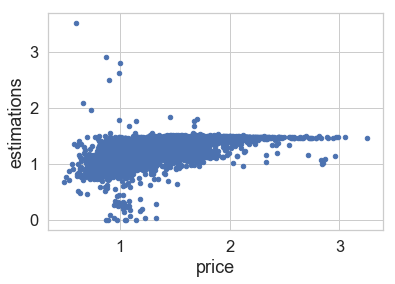

In [153]:
df_predictions.plot(kind='scatter', x='price', y='estimations')

#   Random Forest

In [286]:
from sklearn.ensemble import RandomForestRegressor

In [287]:
avo2 = avo

In [288]:
#One-hot encode 'type' column
dfDummies = pd.get_dummies(avo2['type'], prefix = 'type')
avo2 = pd.concat([avo2, dfDummies], axis=1)

In [290]:
avo2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,type_conventional,type_organic
0,0,12/27/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1,0
1,1,12/20/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,1,0
2,2,12/13/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,1,0
3,3,12/6/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1,0
4,4,11/29/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,1,0


In [281]:
# Labels are the values we want to predict
labels = np.array(avo2['AveragePrice'])
# Remove the labels from the features
# axis 1 refers to the columns
features= avo2.drop('AveragePrice', axis = 1)
# Saving feature names for later use
feature_list = list(avo2.columns)
# Convert to numpy array
avo2 = np.array(features)

In [282]:
train_features, test_features, train_labels, test_labels = train_test_split(features, 
                                        labels, test_size = 0.25, random_state = 42)

In [283]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (13686, 15)
Training Labels Shape: (13686,)
Testing Features Shape: (4563, 15)
Testing Labels Shape: (4563,)


In [238]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('AveragePrice')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)

print('Average baseline error that we want to beat: ', round(np.mean(baseline_errors), 2))

TypeError: unhashable type: 'slice'

In [239]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

ValueError: could not convert string to float: 'Indianapolis'

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X = avo2[['Age', 'Weight', 'Height']].values  
X[0:5]
y = avo2['Medal']
y[0:5]

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
olympicTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
olympicTree # it shows the default parameters

olympicTree.fit(X_trainset,y_trainset)
predTree = olympicTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

In [ ]:
d